<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/series_de_tiempo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU


## **Natural Gas** future

In [ ]:
futuro = 'NG=F'
ticker = yf.Ticker(futuro)
hist = ticker.history(start= '2012-01-01', end= '2024-01-01', interval='1mo')['Close']

hist

,Close
Date,
2012-02-01 00:00:00-05:00,2.616
2012-03-01 00:00:00-05:00,2.126
2012-05-01 00:00:00-04:00,2.422
2012-06-01 00:00:00-04:00,2.824
2012-08-01 00:00:00-04:00,2.799
...,...
2023-07-01 00:00:00-04:00,2.634
2023-08-01 00:00:00-04:00,2.768
2023-09-01 00:00:00-04:00,2.929


In [65]:
# prompt: change index from format 'yyyy-mm-dd 00:00:00-00:00' to 'yyyy-mm-dd'

hist.index = hist.index.strftime('%Y-%m-%d')

In [67]:
hist.index = pd.to_datetime(hist.index)

In [ ]:
hist

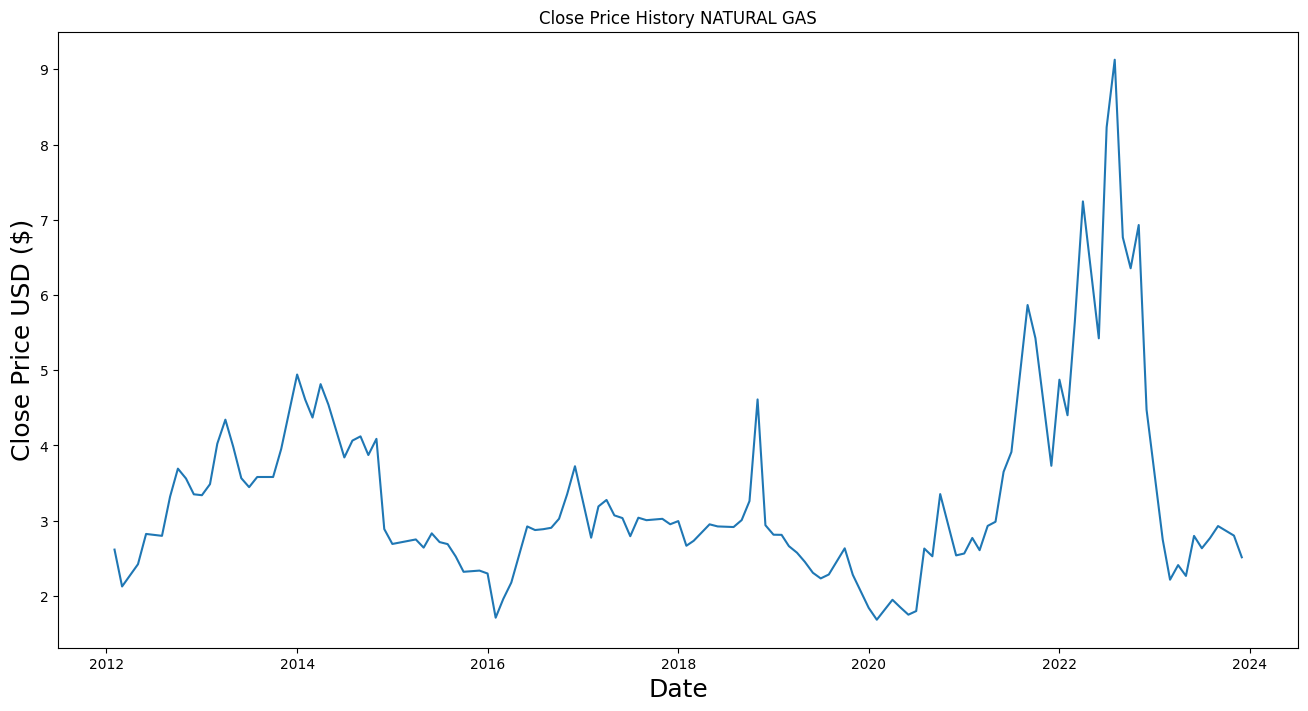

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History NATURAL GAS')
plt.plot(hist)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
piv_index = getattr(hist.index, 'year')
piv_season = getattr(hist.index, 'month')

piv = pd.pivot_table(hist, index=piv_index, columns=piv_season, values='Close')
piv.plot(figsize=(12,8))

KeyError: 'Close'

In [ ]:
hist.head(20)

,Close
Date,
2012-01-03 00:00:00-05:00,2.993
2012-01-04 00:00:00-05:00,3.096
2012-01-05 00:00:00-05:00,2.980
2012-01-06 00:00:00-05:00,3.062
2012-01-09 00:00:00-05:00,3.011
2012-01-10 00:00:00-05:00,2.941
2012-01-11 00:00:00-05:00,2.774
2012-01-12 00:00:00-05:00,2.697
2012-01-13 00:00:00-05:00,2.670


# **META** stock

In [ ]:
stock = 'META'
ticker = yf.Ticker(stock)
hist2 = ticker.history(start= '2013-01-01', end= '2023-12-31', interval='1mo')['Close']

hist2

,Close
Date,
2013-01-01 00:00:00-05:00,30.916470
2013-02-01 00:00:00-05:00,27.194118
2013-03-01 00:00:00-05:00,25.527544
2013-04-01 00:00:00-04:00,27.713053
2013-05-01 00:00:00-04:00,24.300066
...,...
2023-08-01 00:00:00-04:00,295.283234
2023-09-01 00:00:00-04:00,299.594360
2023-10-01 00:00:00-04:00,300.652191


In [ ]:
# prompt: change index from format 'yyyy-mm-dd 00:00:00-00:00' to 'yyyy-mm-dd'

hist2.index = hist2.index.strftime('%Y-%m-%d')


In [ ]:
hist2.index = pd.to_datetime(hist2.index)

In [ ]:
hist2

,Close
Date,
2013-01-01,30.916470
2013-02-01,27.194118
2013-03-01,25.527544
2013-04-01,27.713053
2013-05-01,24.300066
...,...
2023-08-01,295.283234
2023-09-01,299.594360
2023-10-01,300.652191


In [ ]:
hist2.index

DatetimeIndex(['2013-01-01', '2013-02-01', '2013-03-01', '2013-04-01',
               '2013-05-01', '2013-06-01', '2013-07-01', '2013-08-01',
               '2013-09-01', '2013-10-01',
               ...
               '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01',
               '2023-07-01', '2023-08-01', '2023-09-01', '2023-10-01',
               '2023-11-01', '2023-12-01'],
              dtype='datetime64[ns]', name='Date', length=132, freq=None)

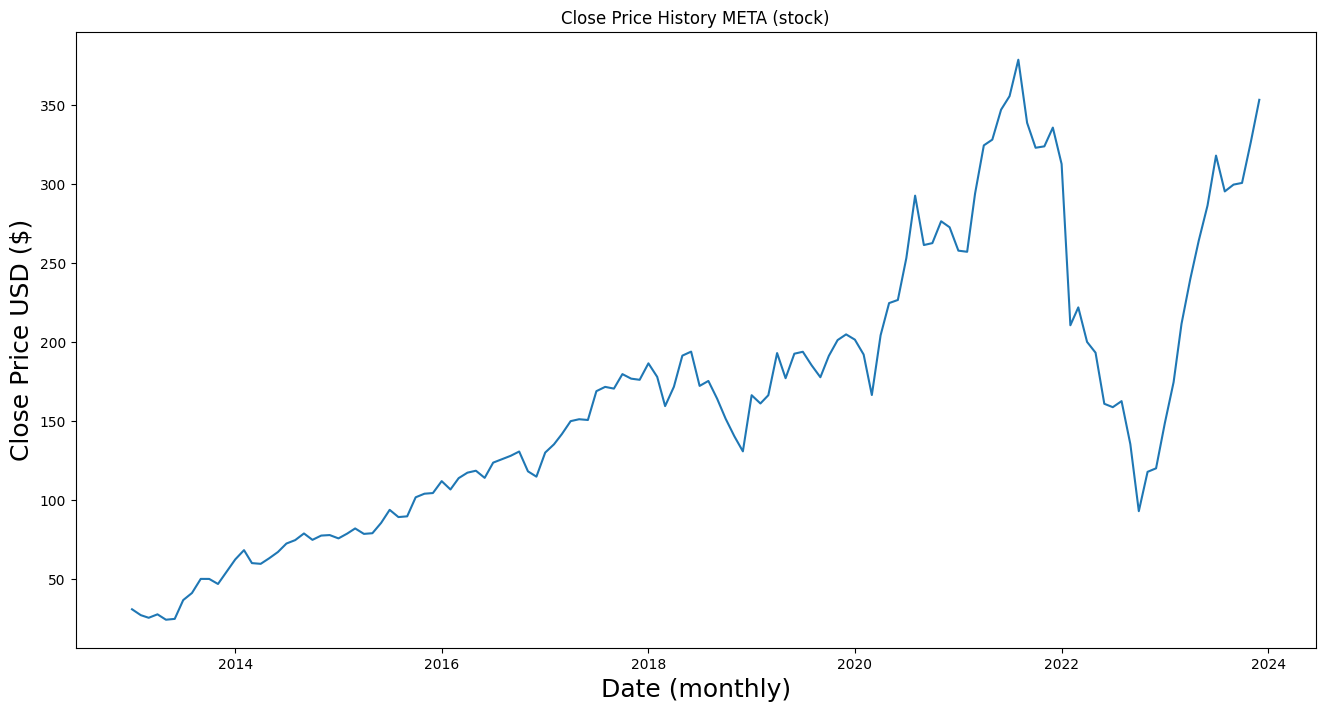

In [17]:
plt.figure(figsize=(16,8))
plt.title('Close Price History META (stock)')
plt.plot(hist2)
plt.xlabel('Date (monthly)', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

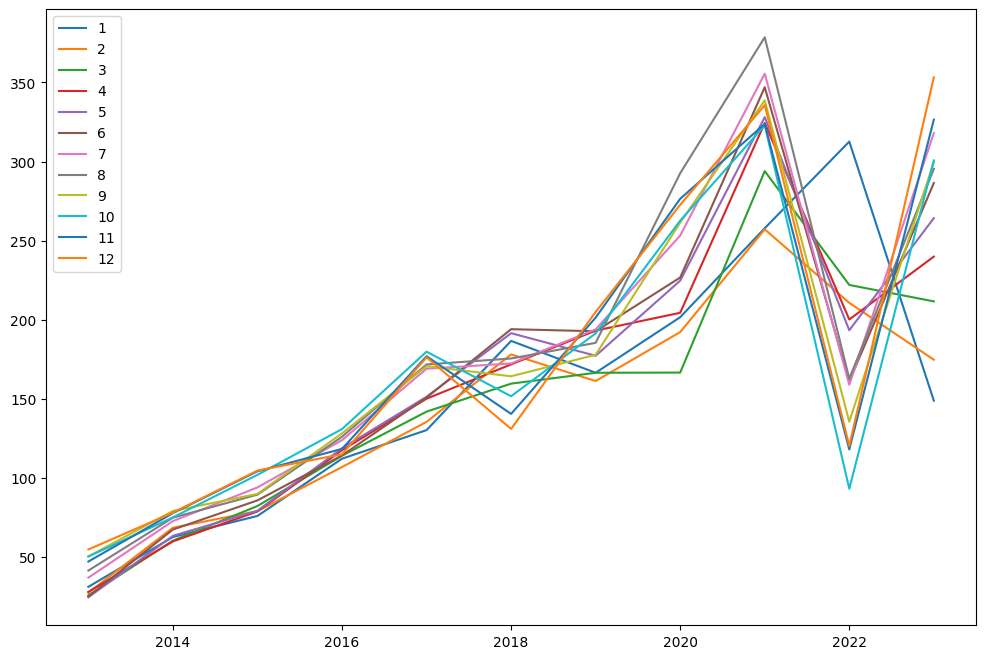

In [49]:
piv_index = getattr(hist2.index, 'year')
piv_season = getattr(hist2.index, 'month')

piv = pd.DataFrame(index=pd.unique(piv_index), columns = pd.unique(piv_season), data = np.reshape(hist2.values, (11,12)))
piv.plot(figsize=(12,8))
plt.legend(pd.unique(piv_season))


In [53]:
    piv = pd.pivot_table(hist2, index=piv_season, columns=piv_index, values=hist2)
    piv.plot(figsize=(12,8), legend = False)

KeyError: 30.916467666625977

In [54]:
piv.head()

,1,2,3,4,5,6,7,8,9,10,11,12
2013,30.916468,27.194118,25.527544,27.713053,24.300064,24.828978,36.724529,41.205326,50.126991,50.107033,46.913597,54.537930
2014,62.441689,68.319611,60.116467,59.657406,63.170189,67.152008,72.501015,74.666565,78.877914,74.836220,77.540649,77.860001
2015,75.754333,78.808052,82.051392,78.608459,79.027611,85.594101,93.817215,89.246605,89.715637,101.760887,104.026230,104.445374
2016,111.979889,106.700737,113.866013,117.338882,118.566353,114.045647,123.685837,125.861366,128.006958,130.721375,118.177147,114.814072
2017,130.052765,135.262039,141.758698,149.941879,151.149414,150.670380,168.902908,171.617340,170.519592,179.690735,176.816650,176.098129


([], [])

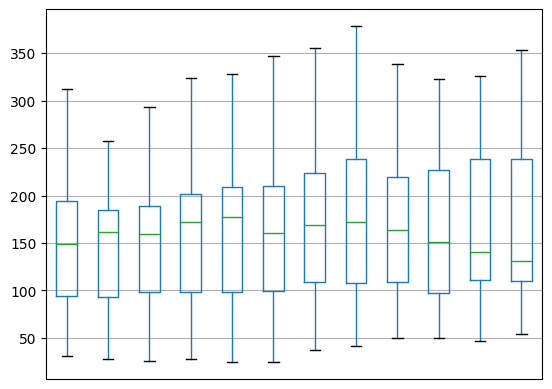

In [55]:
piv.boxplot()
plt.xticks([])

In [20]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot

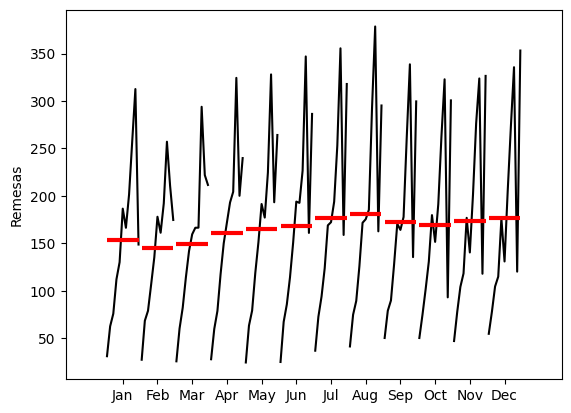

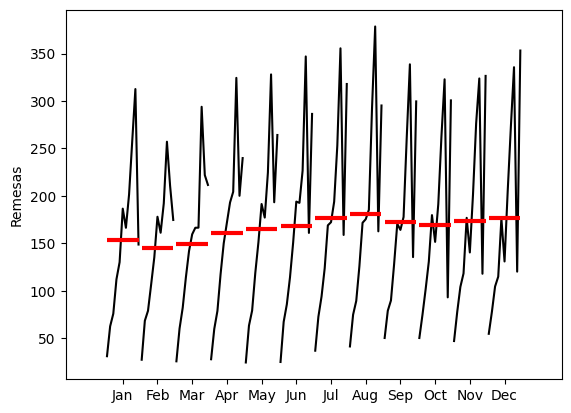

In [22]:
month_plot(hist2, ylabel='Remesas')

In [57]:
pd.plotting.scatter_matrix(hist2)

AttributeError: 'Series' object has no attribute 'columns'

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

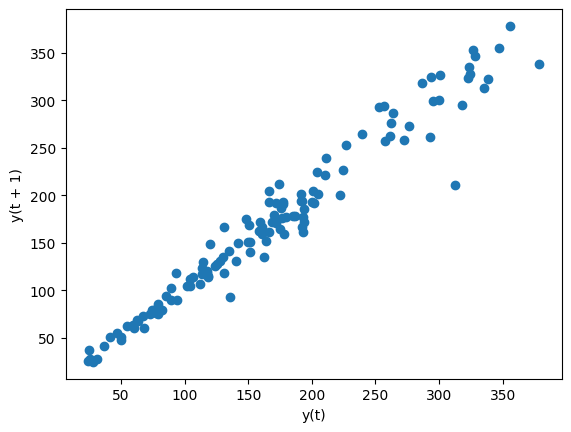

In [26]:
from pandas.plotting import lag_plot
lag_plot(hist2, lag=1)

<Axes: xlabel='y(t)', ylabel='y(t + 2)'>

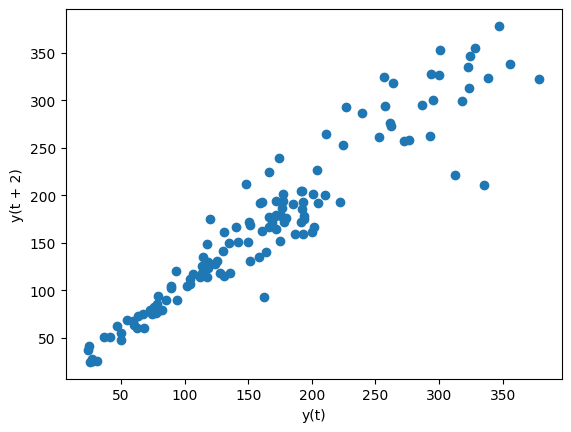

In [28]:
lag_plot(hist2, lag=2)

<Axes: xlabel='y(t)', ylabel='y(t + 6)'>

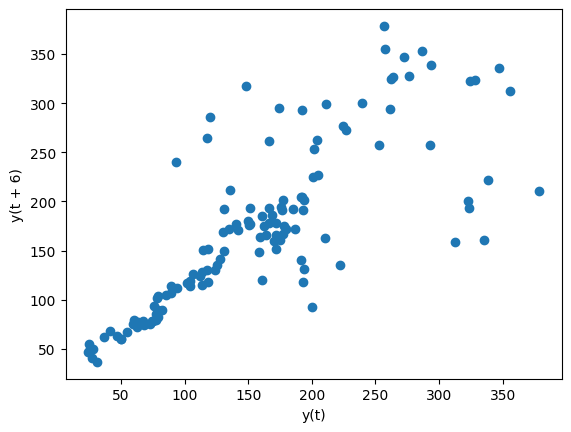

In [29]:
lag_plot(hist2, lag=6)

<Axes: xlabel='y(t)', ylabel='y(t + 6)'>

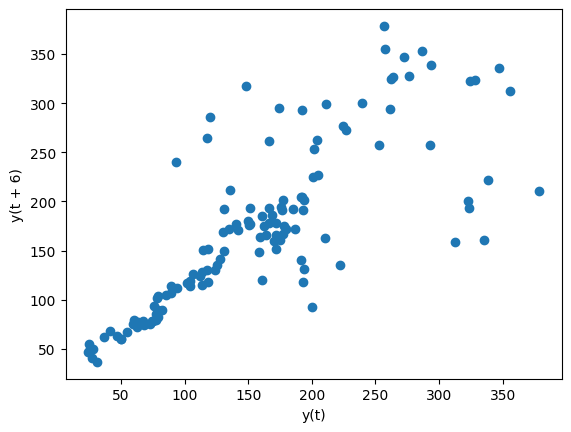

In [30]:
lag_plot(hist2, lag=6)

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

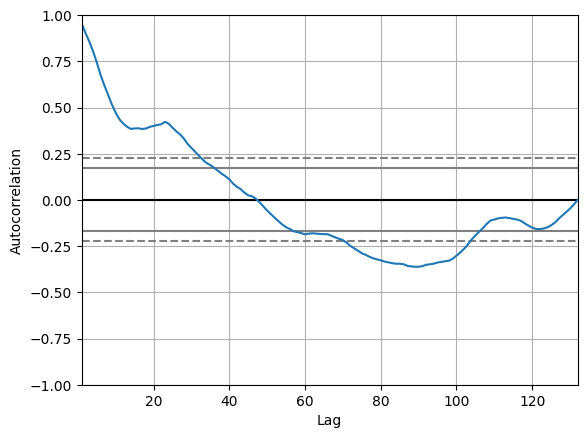

In [31]:
pd.plotting.autocorrelation_plot(hist2)

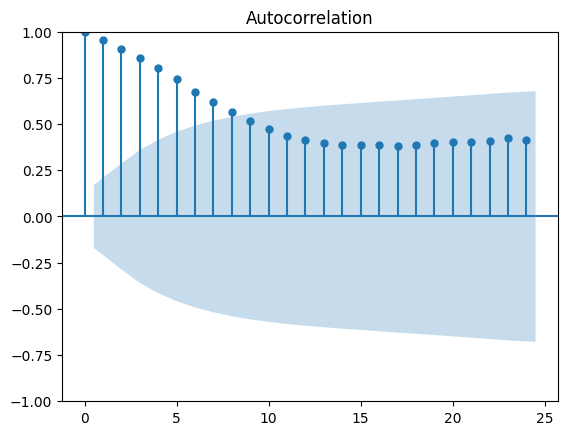

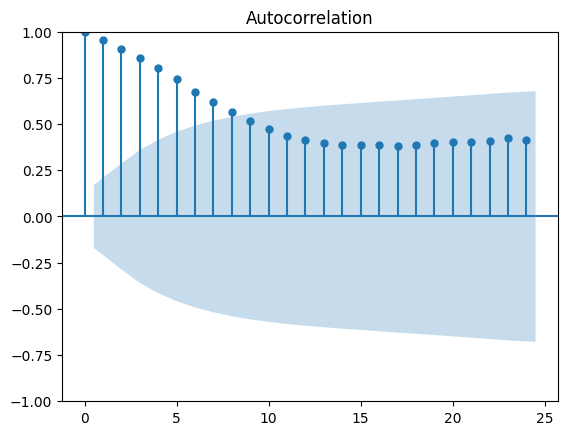

In [32]:
plot_acf(hist2, lags=24)

In [34]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(hist2, model='additive')
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)

Date
2013-01-01   NaN
2013-02-01   NaN
2013-03-01   NaN
2013-04-01   NaN
2013-05-01   NaN
              ..
2023-08-01   NaN
2023-09-01   NaN
2023-10-01   NaN
2023-11-01   NaN
2023-12-01   NaN
Name: trend, Length: 132, dtype: float64
Date
2013-01-01    -0.630015
2013-02-01   -11.975698
2013-03-01    -8.585086
2013-04-01     1.470585
2013-05-01     4.434166
                ...    
2023-08-01    12.991036
2023-09-01     1.351084
2023-10-01    -3.932194
2023-11-01    -3.337577
2023-12-01    -4.558691
Name: seasonal, Length: 132, dtype: float64
Date
2013-01-01   NaN
2013-02-01   NaN
2013-03-01   NaN
2013-04-01   NaN
2013-05-01   NaN
              ..
2023-08-01   NaN
2023-09-01   NaN
2023-10-01   NaN
2023-11-01   NaN
2023-12-01   NaN
Name: resid, Length: 132, dtype: float64
Date
2013-01-01     30.916468
2013-02-01     27.194118
2013-03-01     25.527544
2013-04-01     27.713053
2013-05-01     24.300064
                 ...    
2023-08-01    295.283234
2023-09-01    299.594360
2023-10-01    30

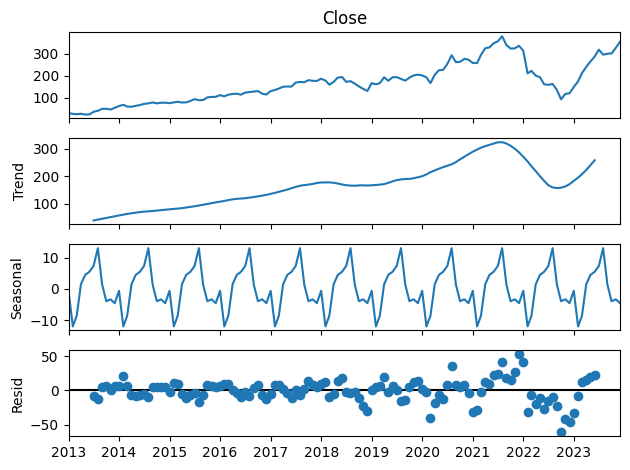

In [36]:
from matplotlib import pyplot
result = seasonal_decompose(hist2, model='additive')
result.plot()
pyplot.show()

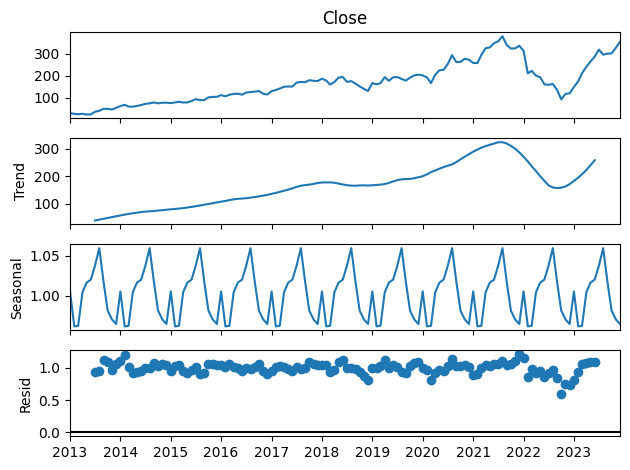

In [38]:
result = seasonal_decompose(hist2, model='multiplicative')
result.plot()
pyplot.show()

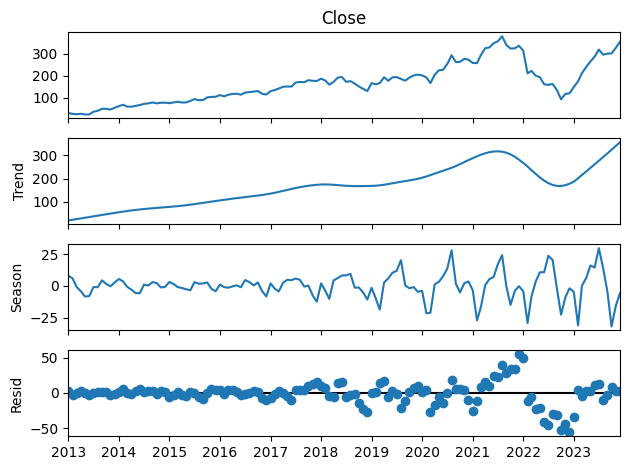

In [40]:
from statsmodels.tsa.seasonal import STL

stl = STL(hist2)
res = stl.fit()
fig = res.plot()

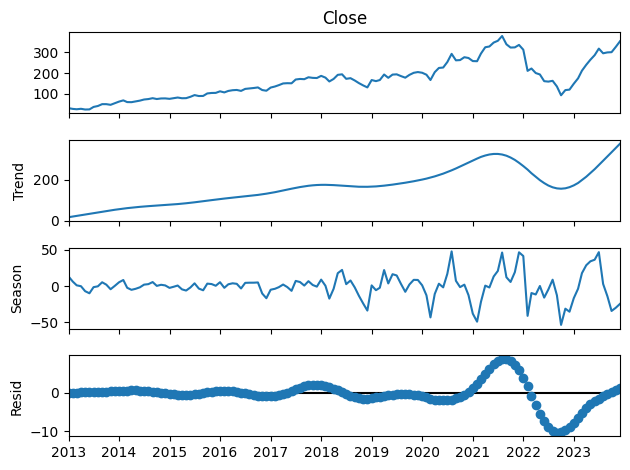

In [42]:
stl = STL(hist2, seasonal=3, trend = 13)
res = stl.fit()
fig = res.plot()

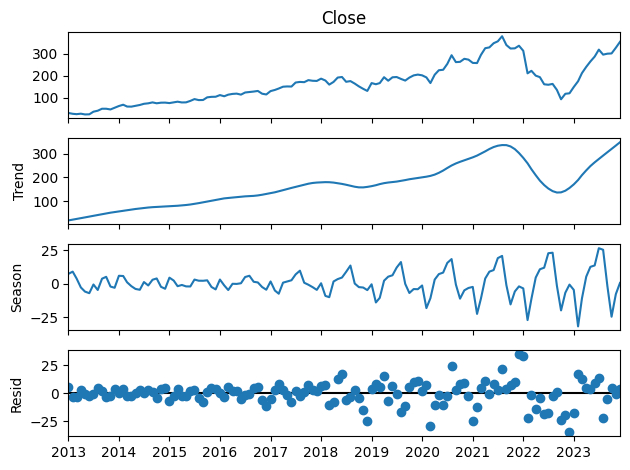

In [44]:
stl = STL(hist2, seasonal=13, trend = 13)
res = stl.fit()
fig = res.plot()

In [59]:
hist2.describe()

,Close
count,132.000000
mean,165.873837
std,88.217962
min,24.300064
25%,93.605150
50%,161.857391
75%,206.271122
max,378.601990


In [60]:
hist2.skew()

0.4822638525875052

In [62]:
hist2.kurtosis()

-0.5353495254394343

<Axes: >

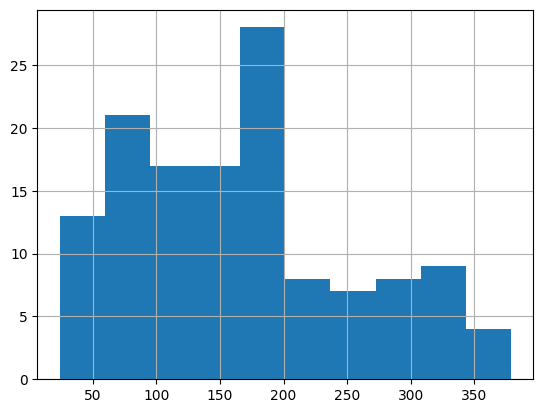

In [64]:
hist2.hist()